In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retail-orders/orders.csv


*Checking no.of rows*

**condition:rows>1000**

In [47]:
import pandas as pd
df=pd.read_csv('/kaggle/input/retail-orders/orders.csv')
print(df.shape)

(9994, 16)


**E-Commerce Sales Analysis**

**About the dataset:*This dataset contains 2022 and 2023 global mart sales dataset***

*We will see the 1st 5 rows*

In [48]:
df.head()


,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


**Cleaning Data**
We should know the rough health of the data first.To know the rough health of the dataset we should know Sizes,types,missingness(null boxes),weird text columns.
**.info()-***gives types and null counts of the dataset*
**.describe()-***gives Statistical summary of dataframe or series*
**.isnull().sum()-***gives missing values count in numeric type*

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order Id          9994 non-null   int64 
 1   Order Date        9994 non-null   object
 2   Ship Mode         9993 non-null   object
 3   Segment           9994 non-null   object
 4   Country           9994 non-null   object
 5   City              9994 non-null   object
 6   State             9994 non-null   object
 7   Postal Code       9994 non-null   int64 
 8   Region            9994 non-null   object
 9   Category          9994 non-null   object
 10  Sub Category      9994 non-null   object
 11  Product Id        9994 non-null   object
 12  cost price        9994 non-null   int64 
 13  List Price        9994 non-null   int64 
 14  Quantity          9994 non-null   int64 
 15  Discount Percent  9994 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 1.2+ MB


*To Know no of null values in numeric type do .isnull().sum()*

In [50]:
df.isnull().sum()


Order Id            0
Order Date          0
Ship Mode           1
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Category            0
Sub Category        0
Product Id          0
cost price          0
List Price          0
Quantity            0
Discount Percent    0
dtype: int64

**From above we came to know ship mode column has one missing value**

In [51]:
df.isnull().sum().sort_values(ascending=False).head(20)

Ship Mode           1
Order Id            0
Order Date          0
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Category            0
Sub Category        0
Product Id          0
cost price          0
List Price          0
Quantity            0
Discount Percent    0
dtype: int64

In [52]:
df.describe()


,Order Id,Postal Code,cost price,List Price,Quantity,Discount Percent
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,201.189714,229.756854,3.789574,3.484090
std,2885.163629,32063.693350,537.743203,623.245839,2.225110,1.114211
min,1.000000,1040.000000,0.000000,0.000000,1.000000,2.000000
25%,2499.250000,23223.000000,20.000000,20.000000,2.000000,2.000000
50%,4997.500000,56430.500000,50.000000,50.000000,3.000000,3.000000
75%,7495.750000,90008.000000,180.000000,210.000000,5.000000,4.000000
max,9994.000000,99301.000000,18110.000000,22640.000000,14.000000,5.000000


Before Cleaning Data we will go through some methods
**1.Standardize Column Names**
**2.Fixing Data Types**

In [53]:
df.columns=(df.columns.str.strip().str.lower().str.replace(' ','_').str.replace('[^0-9a-zA-Z]','',regex=True))
#str.strip() removes leading and trailing spaces
#str.lower() converts all characters of the string to lowercase
#str.replace(a,b) replaces a with b where,a and b are characters 

In [54]:
df.columns


Index(['orderid', 'orderdate', 'shipmode', 'segment', 'country', 'city',
       'state', 'postalcode', 'region', 'category', 'subcategory', 'productid',
       'costprice', 'listprice', 'quantity', 'discountpercent'],
      dtype='object')

In [55]:
df[['costprice','listprice','quantity']]=df[['costprice','listprice','quantity']].apply(pd.to_numeric,errors='coerce')
df['orderdate']=df['orderdate'].apply(pd.to_datetime,errors='coerce')
df[['shipmode','segment', 'country', 'city','state', 'postalcode', 'region', 'category', 'subcategory']]=df[['shipmode','segment', 'country', 'city','state', 'postalcode', 'region', 'category', 'subcategory']].apply(lambda x:x.astype('category'))
df['discountpercent']=df['discountpercent'].astype(float)
df[['orderid','productid','postalcode']]=df[['orderid','productid','postalcode']].apply(lambda x:x.astype(str))

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   orderid          9994 non-null   object        
 1   orderdate        9994 non-null   datetime64[ns]
 2   shipmode         9993 non-null   category      
 3   segment          9994 non-null   category      
 4   country          9994 non-null   category      
 5   city             9994 non-null   category      
 6   state            9994 non-null   category      
 7   postalcode       9994 non-null   object        
 8   region           9994 non-null   category      
 9   category         9994 non-null   category      
 10  subcategory      9994 non-null   category      
 11  productid        9994 non-null   object        
 12  costprice        9994 non-null   int64         
 13  listprice        9994 non-null   int64         
 14  quantity         9994 non-null   int64  

In [57]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

In [58]:
df.duplicated().sum()

0

**It Means There are no duplicates **
And if there were duplicates then we remove by using the method .drop_duplicates()
Let's create a duplicate row manually and remove it

In [59]:
# Duplicate row 0 and append it
df = pd.concat([df, df.iloc[[0]]], ignore_index=True)
print(df.head())

  orderid  orderdate        shipmode    segment        country  \
0       1 2023-03-01    Second Class   Consumer  United States   
1       2 2023-08-15    Second Class   Consumer  United States   
2       3 2023-01-10    Second Class  Corporate  United States   
3       4 2022-06-18  Standard Class   Consumer  United States   
4       5 2022-07-13  Standard Class   Consumer  United States   

              city       state postalcode region         category subcategory  \
0        Henderson    Kentucky      42420  South        Furniture   Bookcases   
1        Henderson    Kentucky      42420  South        Furniture      Chairs   
2      Los Angeles  California      90036   West  Office Supplies      Labels   
3  Fort Lauderdale     Florida      33311  South        Furniture      Tables   
4  Fort Lauderdale     Florida      33311  South  Office Supplies     Storage   

         productid  costprice  listprice  quantity  discountpercent  
0  FUR-BO-10001798        240        260      

In [60]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9990    False
9991    False
9992    False
9993    False
9994     True
Length: 9995, dtype: bool

In [61]:
df.duplicated().sum()

1

**Now row '0' is twice in the dataframe so, we will remove that by using .dropna() or we have another method directly for droping duplicates instead of manually mentioning evry duplicate manually is .drop_duplicates(inplace=True)**

In [62]:
df.drop_duplicates(inplace=True)#.drop_duplicates() returns a new dataframe.If we mention inplace=True then it modifies there itself instead of returning new

**Re-check DataFrame again for the duplicates Whether they are removed or stil in the df**

In [63]:
df.duplicated().sum()

0

**Finding Missing values**

In [64]:
df.isnull()

,orderid,orderdate,shipmode,segment,country,city,state,postalcode,region,category,subcategory,productid,costprice,listprice,quantity,discountpercent
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [65]:
df.isnull().sum()

orderid            0
orderdate          0
shipmode           1
segment            0
country            0
city               0
state              0
postalcode         0
region             0
category           0
subcategory        0
productid          0
costprice          0
listprice          0
quantity           0
discountpercent    0
dtype: int64

*As we know 'Shipmode belongs to category dtype then we will make fall most repeated category in that cell or drop the row cause it wont effect that much by dropping 1*

In [66]:
df.fillna({'shipmode':df['shipmode'].mode()[0]},inplace=True)

In [67]:
df.isnull().sum()

orderid            0
orderdate          0
shipmode           0
segment            0
country            0
city               0
state              0
postalcode         0
region             0
category           0
subcategory        0
productid          0
costprice          0
listprice          0
quantity           0
discountpercent    0
dtype: int64

**Exploring and Retrieving Data with the help of indexing,slicing and grouping**
*Indexing:Selecting rows or columns*
*Slicing:Extract sub dataframe *
*grouping:Split Data by category*
*Aggregation:Summary Stats of grouped data*

In [68]:
df['shipmode']

0         Second Class
1         Second Class
2         Second Class
3       Standard Class
4       Standard Class
             ...      
9989      Second Class
9990    Standard Class
9991    Standard Class
9992    Standard Class
9993      Second Class
Name: shipmode, Length: 9994, dtype: category
Categories (6, object): ['First Class', 'Not Available', 'Same Day', 'Second Class', 'Standard Class', 'unknown']

In [69]:
df[['shipmode','region']]

,shipmode,region
0,Second Class,South
1,Second Class,South
2,Second Class,West
3,Standard Class,South
4,Standard Class,South
...,...,...
9989,Second Class,South
9990,Standard Class,West
9991,Standard Class,West
9992,Standard Class,West


In [70]:
#Accessing 1st row of shipmode column-->'Second Class'
df.loc[0,'shipmode']#here '0' is index and 'shipmode' is label(index name)

'Second Class'

In [71]:
df.head(10)

,orderid,orderdate,shipmode,segment,country,city,state,postalcode,region,category,subcategory,productid,costprice,listprice,quantity,discountpercent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2.0
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3.0
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5.0
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2.0
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5.0
5,6,2022-03-13,Not Available,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,FUR-FU-10001487,50,50,7,3.0
6,7,2022-12-28,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,OFF-AR-10002833,10,10,4,3.0
7,8,2022-01-25,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,TEC-PH-10002275,860,910,6,5.0
8,9,2023-03-23,Not Available,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,OFF-BI-10003910,20,20,3,2.0
9,10,2023-05-16,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,OFF-AP-10002892,90,110,5,3.0


In [72]:
#Now we will access by using positions
df.iloc[0,1]#Which means it results value of row-0 and column-1 

Timestamp('2023-03-01 00:00:00')

In [73]:
#From above table we can see that column-2 is of label named 'shipmode'.Now we will access same second class which is at the position row-0 and column-2
df.iloc[0,2]

'Second Class'

In [74]:
#For grouping first we should select the category in this 'shipmode' is of type category and data related to that category to split we will consider 'costprice'
df.groupby('shipmode',observed=True)['costprice'].sum()#Here .sum() gives sum of all boxes of costprice with respect to the categories.

shipmode
First Class        308790
Not Available        2290
Same Day           112760
Second Class       401590
Standard Class    1185200
unknown                60
Name: costprice, dtype: int64

In [75]:
#we can also group multiple categories and apply aggregation methods 
df.groupby(['shipmode','region'],observed=True)['costprice'].count()#.count() returns no.of non missing values

shipmode        region 
First Class     Central     299
                East        490
                South       234
                West        515
Not Available   West          4
Same Day        Central     120
                East        155
                South        83
                West        185
Second Class    Central     465
                East        530
                South       329
                West        621
Standard Class  Central    1438
                East       1673
                South       974
                West       1878
unknown         Central       1
Name: costprice, dtype: int64

**Aggregation methods:**
**Single Aggregation*
count() → number of non-missing values
nunique() → number of unique values
size() → total group size (ignores NaNs unlike count)
sum() → sum of values
mean() → average
median() → median
min() / max() → min and max
std() → standard deviation
var() → variance
prod() → product of all values
**Multiple Aggregation**
combining more than one single aggregation methods in a list.

In [76]:
#Lets apply multiple aggregation. We will use both .sum() and .count()
df.groupby(['shipmode'],observed=True)['costprice'].agg(['sum','count'])

,sum,count
shipmode,,
First Class,308790,1538
Not Available,2290,4
Same Day,112760,543
Second Class,401590,1945
Standard Class,1185200,5963
unknown,60,1


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


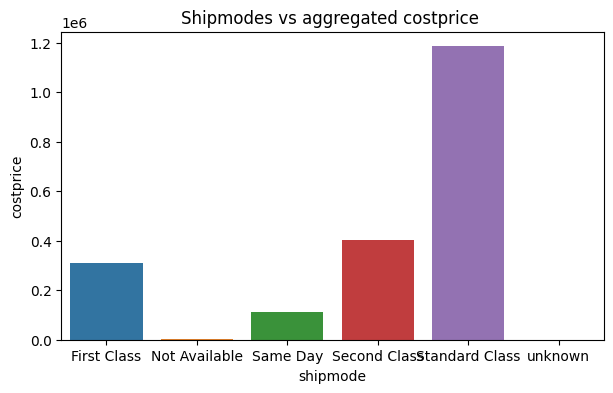

In [84]:
#Bar Chart-Total costprice per shipmode
import matplotlib.pyplot as plt
import seaborn as sns
 #lets draw a bar graph b/w shipmode(category) and costprice(numerical data sum)
shipmode_sum=df.groupby(['shipmode'],observed=True)['costprice'].agg('sum').reset_index()
plt.figure(figsize=(7,4))
sns.barplot(data=shipmode_sum,x='shipmode',y='costprice')
plt.title('Shipmodes vs aggregated costprice ')
plt.xlabel('shipmode')
plt.ylabel('costprice')
plt.show()


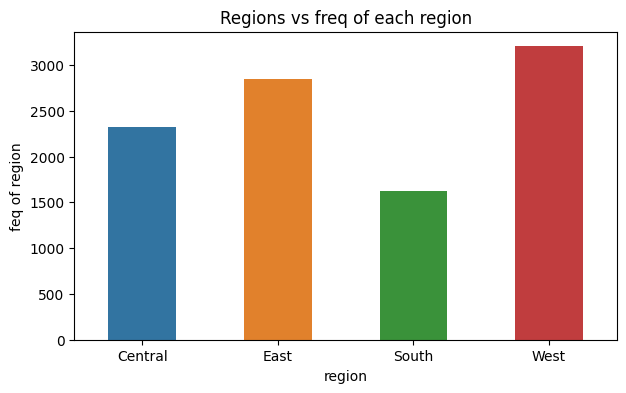

In [119]:
#count plot-how many orders per shipmode
plt.figure(figsize=(7,4))
sns.countplot(data=df,x='region',width=0.5)
plt.title('Regions vs freq of each region')
plt.ylabel('feq of region')
plt.show()

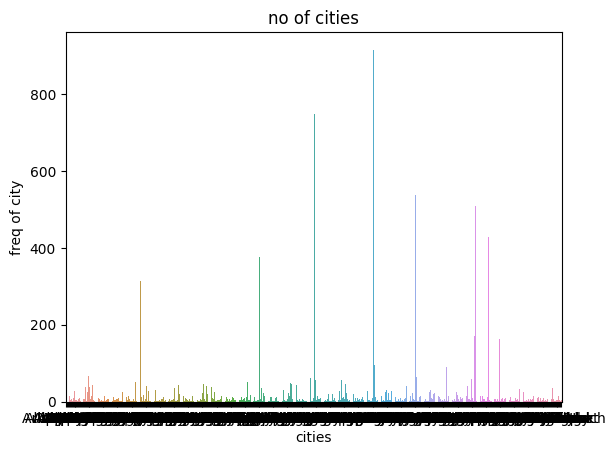

In [107]:
#We will analyse data of orders w.r.t each country--countplot makes it easy
sns.countplot(data=df,x='city')
plt.title('no of cities')
plt.ylabel('freq of city')
plt.xlabel('cities')
plt.show()

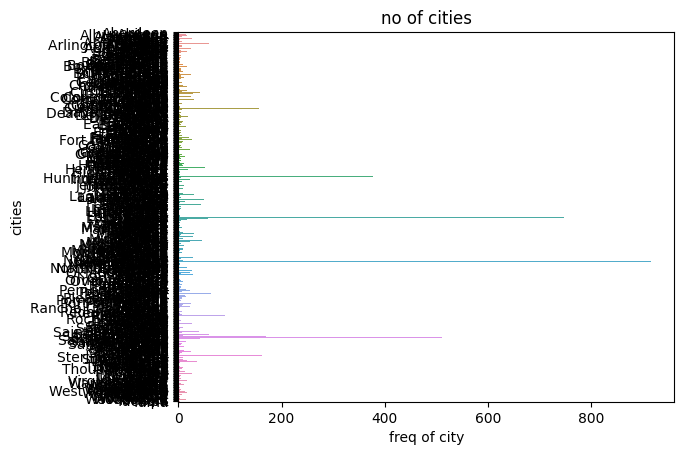

In [120]:
#If we want to change the axis x-y and y-x simply cahnge x to y
#We will analyse data of orders w.r.t each country--countplot makes it easy
sns.countplot(data=df,y='city')
plt.title('no of cities')
plt.xlabel('freq of city')
plt.ylabel('cities')
plt.show()

**Boxplot logic:**
Box middle line = median.
Box edges = Q1 (25th percentile) and Q3 (75th percentile).
Whiskers = data spread within 1.5×IQR.
Dots beyond whiskers = outliers.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


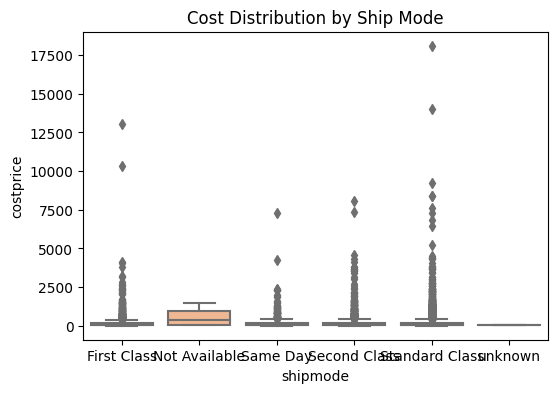

In [121]:
#Box plot of cost distribution per Ship Mode-used when we want to compare spread & outliers across categories.
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='shipmode', y='costprice', palette='pastel')
plt.title("Cost Distribution by Ship Mode")
plt.show()

Those dots are outliers (Strange numbers that are too high or low)

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


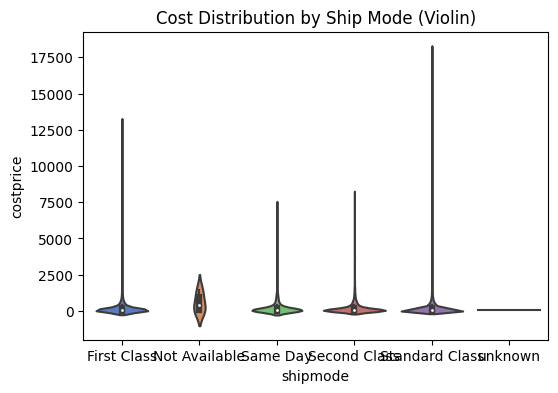

In [122]:
#violin plot=boxplot+shape of the data--use when you want both summary and full story of distribution
plt.figure(figsize=(6,4))
sns.violinplot(data=df, x='shipmode', y='costprice', palette='muted')
plt.title("Cost Distribution by Ship Mode (Violin)")
plt.show()

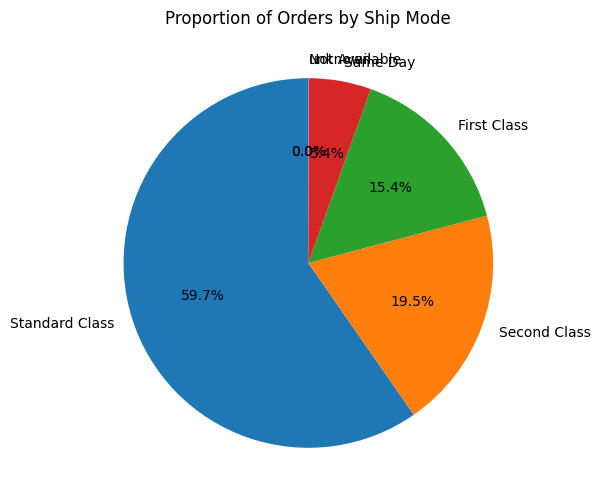

In [125]:
#To compare proportions among categories
shipmode_count = df['shipmode'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(shipmode_count, labels=shipmode_count.index, autopct='%1.1f%%', startangle=90)
plt.title("Proportion of Orders by Ship Mode")
plt.show()

/tmp/ipykernel_36/979218931.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shipmode_mean = df.groupby('shipmode')['costprice'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


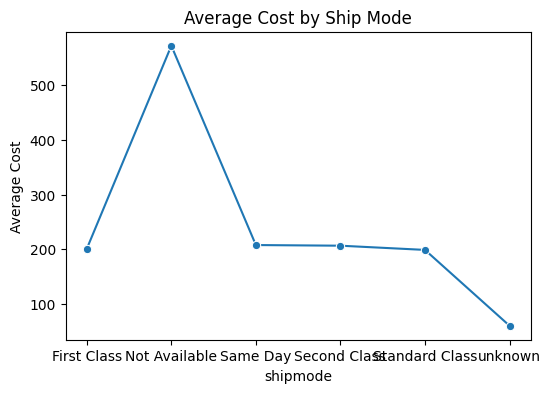

In [124]:
#Line plot is connects points with a line--here eachpoint=avg cost per shipmode and line helps see order
shipmode_mean = df.groupby('shipmode')['costprice'].mean().reset_index()
#This is best to use when order matters
plt.figure(figsize=(6,4))
sns.lineplot(data=shipmode_mean, x='shipmode', y='costprice', marker='o')
plt.title("Average Cost by Ship Mode")
plt.ylabel("Average Cost")
plt.show()